# Task 2. Многоклассовая классификация

1. Подготовить анализ и обработку датасета

## Imports

In [ ]:
!pip install pymorphy2

In [ ]:
!python -m spacy download ru_core_news_sm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import download
import html
import re
from tqdm import tqdm
import pymorphy2
from wordcloud import WordCloud

download('punkt')
download('stopwords')
stop_words = stopwords.words('russian')

from pymorphy2 import MorphAnalyzer
morph = pymorphy2.MorphAnalyzer()
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 1. Анализ и обработка датасета

In [4]:
df = pd.read_excel('dataset.xlsx')
df.head()

,oid,text,category
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,esport
1,749208109,Пусть это побудет здесь БорьбаВпрямомЭфире How...,esport
2,749208109,Раздача пиздюлей от Мунсунга. HowToFtokenoid Б...,esport
3,749208109,Не знаю как вам но мне стилистика нравится пус...,esport
4,749208109,Скриншоты из новой главы. Тэхунчика показали и...,esport


## 1. Анализ датасета

In [5]:
for i in df['text'][:10]:
    print(i)
    for m in range(20):
        print('-', end='')
    print( )

СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПКОЙ ПИШИТЕ В ЛС 33 ВСЕ ГАРАНТИИ С МЕНЯ 33
--------------------
Пусть это побудет здесь БорьбаВпрямомЭфире HowToHtokenoid
--------------------
Раздача пиздюлей от Мунсунга. HowToFtokenoid БорьбаВПрямомЭфире
--------------------
Не знаю как вам но мне стилистика нравится пускай она и странная. HowToFtokenoid БорьбаВПрямомЭфире
--------------------
Скриншоты из новой главы. Тэхунчика показали и Хобина ️
--------------------
Зато они все вместе. . HowToFtokenoid БорьбаВПрямомЭфире
--------------------
Мне кажется что мы теряем мальчика с вросшим ногтем. HowToFtokenoid Hotokenoid
--------------------
Недельный топ донатеров открыт. Минимальный донат 1 рубль. Призы ~Самый большой донат за неделю получит 4 стикерпака. ~Так же рандомный донат получит 1 стикерпак. Учитываются донаты только за эту неделю 33 Конец 25 августа в 21 00 по мск 33
--------------------
Естественное восстановление после тяжелой тренировки занимает 72 часа. С криокамерой 24 ча

**1.1. Категории и их распределение**

In [6]:
df['category'].value_counts(normalize=True)

category
athletics       0.089891
volleyball      0.088030
tennis          0.086169
boardgames      0.085548
winter_sport    0.085266
motosport       0.085116
esport          0.084759
basketball      0.081375
football        0.080116
martial_arts    0.080059
extreme         0.059626
autosport       0.059250
hockey          0.034795
Name: proportion, dtype: float64

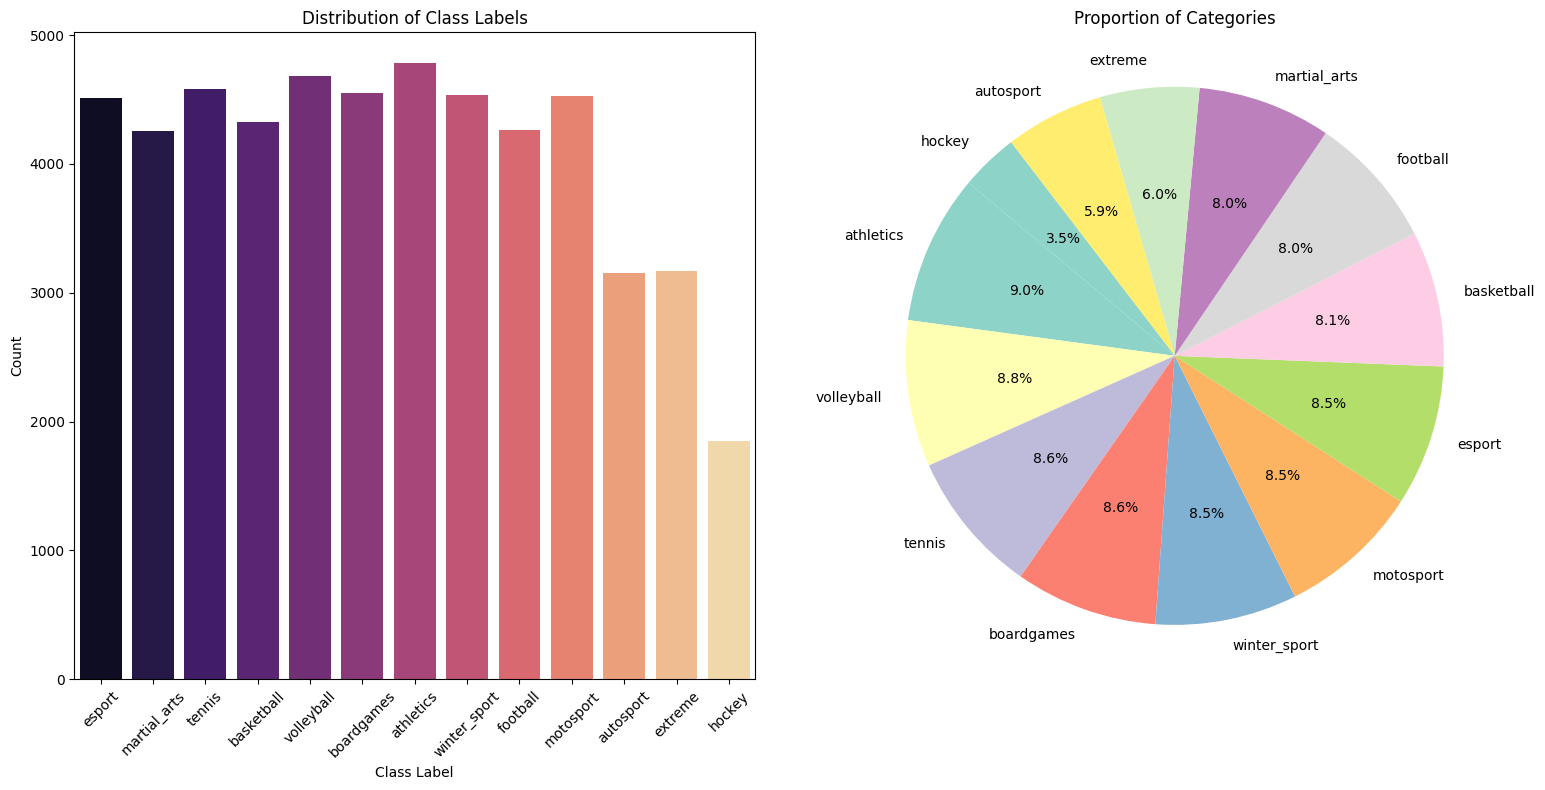

In [7]:
counts = df['category'].value_counts(normalize=True).sort_values(ascending=False)
colors = sns.color_palette('Set3', len(counts))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=df, x='category', ax=axes[0], hue='category', palette='magma')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Class Labels')
axes[0].tick_params(axis='x', rotation=45)

axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Proportion of Categories')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


**1.2 Облако слов и предобработка датасета**

In [19]:
def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'http\S+', '', text).lower()
    text = re.sub(r'[^а-яёa-z]', ' ', text)
    text = word_tokenize(text)
    text_clean = [word for word in text if word not in set(stop_words) and len(word) > 2]

    lemmatized_text = list()
    for word in text_clean:
        result = morph.parse(word)
        most_probable_result = result[0]
        normal_form = most_probable_result.normal_form
        lemmatized_text.append(normal_form)

    return ' '.join(lemmatized_text)

In [21]:
tqdm.pandas()

df['cleaned_text'] = df['text'].progress_apply(clean_text)

100%|██████████| 53198/53198 [08:13<00:00, 107.72it/s]


In [8]:
len(df)

53198

In [9]:
df = df.drop_duplicates()
print(len(df))

52714


In [10]:
missing_values = df.isnull().sum()
missing_values

oid         0
text        0
category    0
dtype: int64

In [11]:
df.head()

,oid,text,category
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,esport
1,749208109,Пусть это побудет здесь БорьбаВпрямомЭфире How...,esport
2,749208109,Раздача пиздюлей от Мунсунга. HowToFtokenoid Б...,esport
3,749208109,Не знаю как вам но мне стилистика нравится пус...,esport
4,749208109,Скриншоты из новой главы. Тэхунчика показали и...,esport


In [29]:
df.to_excel('cleaned_dataset.xlsx', index=False)

In [12]:
df = pd.read_excel('cleaned_dataset.xlsx')

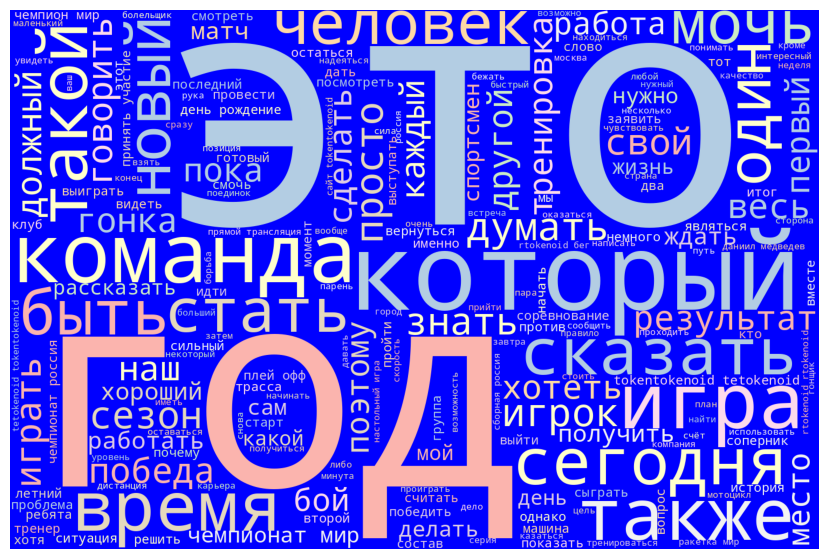

In [14]:
text = df['cleaned_text']

wordcloud = WordCloud(width = 1500,
                      height = 1000,
                      background_color='blue',
                      colormap='Pastel1').generate(', '.join(text))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**1.3. Среднее кол-во предложений в тексте и средняя длина предложения**

In [15]:
def sentence_count(text):
    sentences = text.split('.')
    sentences = [sentence for sentence in sentences if sentence.strip()]
    return len(sentences)

df['sentence_count'] = df['text'].apply(sentence_count)
overall_avg_sentence_count = df['sentence_count'].mean()
print("Overall average sentence count:", round(overall_avg_sentence_count, 1))

Overall average sentence count: 4.3


In [16]:
def average_sentence_length(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    return sum(sentence_lengths) / len(sentences)

df['avg_sentence_length'] = df['text'].apply(average_sentence_length)
print("Average sentence length:", round(df['avg_sentence_length'].mean(), 1))

Average sentence length: 16.2


In [17]:
df.head()

,oid,text,category,cleaned_text,sentence_count,avg_sentence_length
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,esport,спочно сообщество продаваться покупка писать г...,1,16.0
1,749208109,Пусть это побудет здесь БорьбаВпрямомЭфире How...,esport,пусть это побыть борьбавпрямомэфир howtohtokenoid,1,6.0
2,749208109,Раздача пиздюлей от Мунсунга. HowToFtokenoid Б...,esport,раздача пиздюля мунсунг howtoftokenoid борьбав...,2,3.0
3,749208109,Не знаю как вам но мне стилистика нравится пус...,esport,знать стилистика нравиться пускай странный how...,2,7.0
4,749208109,Скриншоты из новой главы. Тэхунчика показали и...,esport,скриншот новый глава тэхунчик показать хобин,2,4.5


**1.4. Самые частотные слова в каждой категории**

In [18]:
df['Words'] = df['cleaned_text'].apply(lambda row: row.split())

def get_top_words(corpus, n=None):
    counter = Counter(corpus)
    return counter.most_common(n)

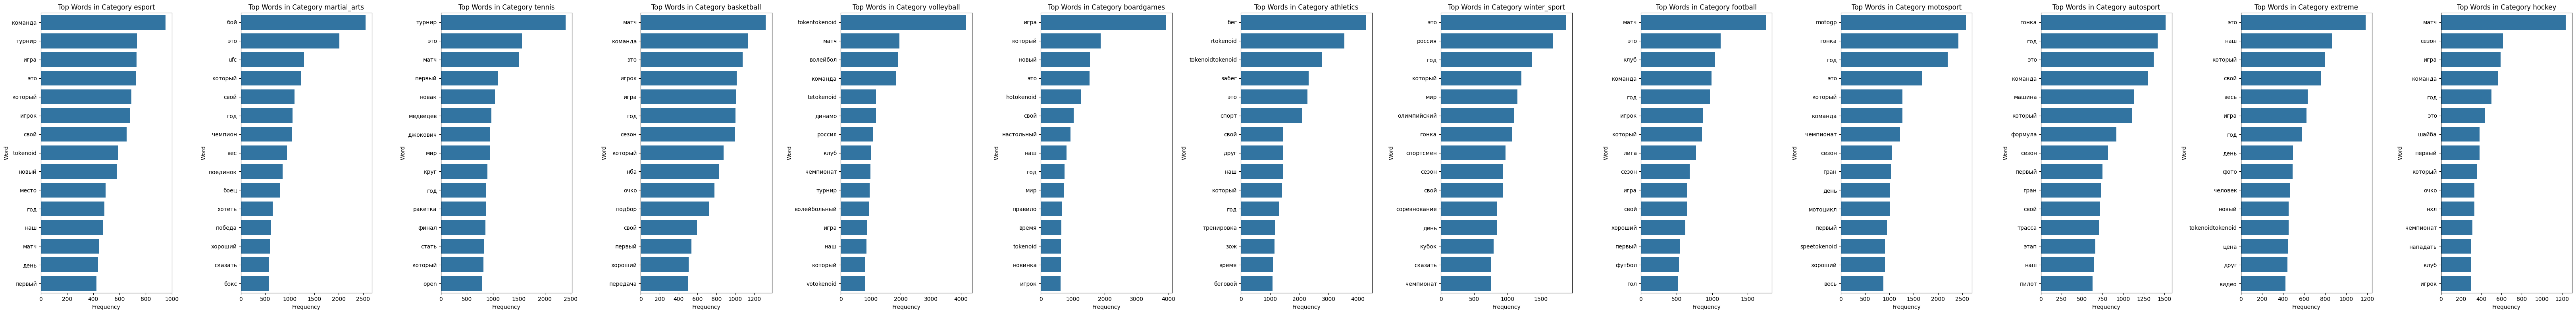

In [19]:
num_categories = len(df['category'].unique())
fig, axes = plt.subplots(1, len(df['category'].unique()), figsize=(5 * num_categories, 8))

for i, label in enumerate(df['category'].unique()):
    class_df = df[df['category'] == label]

    all_words = [word for words in class_df['Words'] for word in words]
    top_words = get_top_words(all_words, 15)
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    sns.barplot(x='Frequency', y='Word', data=top_words_df, ax=axes[i])
    axes[i].set_title(f"Top Words in Category {label}")

plt.tight_layout()
plt.show()

**1.5. Именованные сущности**

нахожу их только для одной категории, так как обработка занимает много времени

In [29]:
import spacy
nlp = spacy.load("ru_core_news_sm")
nlp.max_length = 21015007

In [35]:
tennis_df = df[df['category']=='tennis']

In [37]:
text = ' '.join(tennis_df['text'])
doc = nlp(text)

In [45]:
labels_set = set()
for ent in doc.ents:
    labels_set.add(ent.label_)
labels_set

{'LOC', 'ORG', 'PER'}

Processing categories: 100%|██████████| 3/3 [00:13<00:00,  4.56s/it]


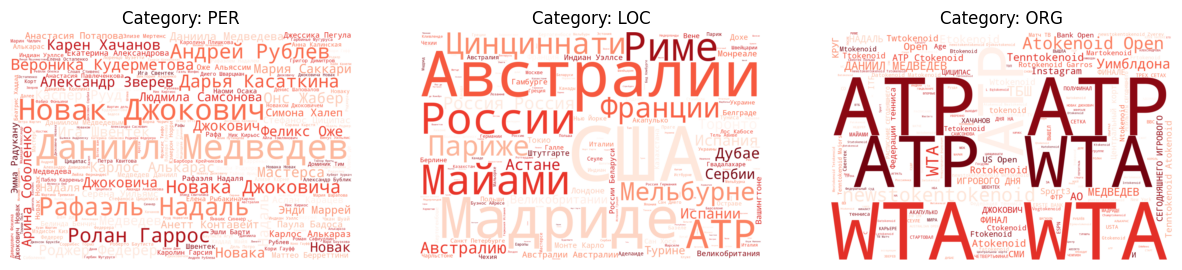

In [48]:
fig, axes = plt.subplots(1, len(labels_set), figsize=(5 * len(labels_set), 8))

for i, label in tqdm(enumerate(labels_set), total=len(labels_set), desc="Processing categories"):
    entities = list()
    for ent in doc.ents:
        if ent.label_ == label:
            entities.append(ent.text)

    text = ' '.join(entities)
    wordcloud = WordCloud(width=1500, height=1000, background_color='white', colormap='Reds_r').generate(text)

    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Category: {label}")
    ax.axis("off")

plt.show()